# Project - Crude Oil

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
data=pd.read_csv("C:/Users/Rishi/Downloads/Crude_Oil_Price_2000_2023.csv")
data

,Date,Price
0,20-Jul-23,75.73
1,19-Jul-23,75.35
2,18-Jul-23,75.75
3,17-Jul-23,74.15
4,14-Jul-23,75.42
...,...,...
6031,10-Jan-00,24.67
6032,07-Jan-00,24.22
6033,06-Jan-00,24.78
6034,05-Jan-00,24.91


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036 entries, 0 to 6035
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6036 non-null   object 
 1   Price   6036 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.4+ KB


In [ ]:
data[data.duplicated()]

,Date,Price


In [ ]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [ ]:
data.describe()

,Price
count,6036.000000
mean,62.953279
std,25.764812
min,-37.630000
25%,42.757500
50%,60.570000
75%,82.395000
max,145.290000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce')
data

,Date,Price
0,2023-07-20,75.73
1,2023-07-19,75.35
2,2023-07-18,75.75
3,2023-07-17,74.15
4,2023-07-14,75.42
...,...,...
6031,2000-01-10,24.67
6032,2000-01-07,24.22
6033,2000-01-06,24.78
6034,2000-01-05,24.91


In [ ]:
data=data.set_index('Date')
data.head()

,Price
Date,
2023-07-20,75.73
2023-07-19,75.35
2023-07-18,75.75
2023-07-17,74.15
2023-07-14,75.42


In [ ]:
data=data.sort_index(axis=0,ascending=True)
data.head()

,Price
Date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-10,24.67


In [ ]:
#As observed we have 2 days are missing weekly in our dataset
start = data.index[0].date()

end = data.index[len(data)-1].date()

new_dates = pd.date_range(start=start,end=end,freq='D')

data = data.reindex(new_dates)

data = data.rename_axis('Date')

In [ ]:
data['Price']=data['Price'].fillna(method ='ffill')
data.head(30)

,Price
Date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-08,24.22
2000-01-09,24.22
2000-01-10,24.67
2000-01-11,25.77
2000-01-12,26.28


In [ ]:
data['Price']=data['Price'].fillna(method ='ffill')

In [ ]:
data.head(30)

,Price
Date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-08,24.22
2000-01-09,24.22
2000-01-10,24.67
2000-01-11,25.77
2000-01-12,26.28


In [ ]:
data.shape

(8599, 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc422276a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc42227c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc42227520>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc42244250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc42244520>],
 'means': []}

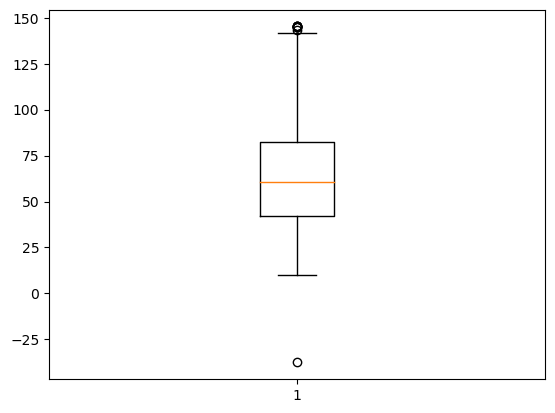

In [ ]:
plt.boxplot(data['Price'],vert=True)

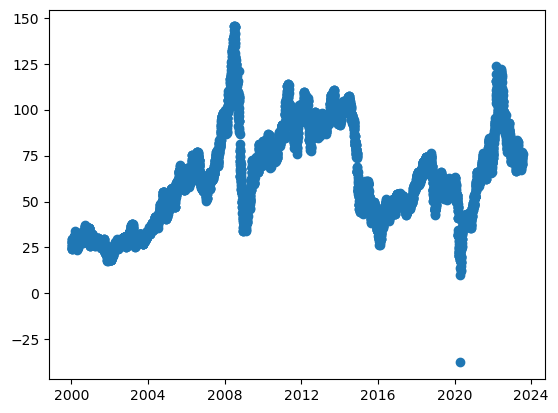

In [ ]:
plt.scatter(data.index, data.Price)

In [ ]:
mean = np.mean(data['Price'])
std = np.std(data['Price'])
print('mean of the data is', mean)
print('std. deviation is', std)

mean of the data is 62.84363181765343
std. deviation is 25.876772103372204


### Detecting Outlier using the Z score

Using Z score

Formula for Z score = (Observation - Mean)/Standard Deviation

In [ ]:
outliers=[]
def detect_outliers(data):
    outliers = []  # Initialize the outliers list inside the function

    threshold = 3
    mean = np.mean(data['Price'])
    std = np.std(data['Price'])

    for i in data['Price']:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

In [ ]:
result_outliers = detect_outliers(data)
print("Outliers:", result_outliers)

Outliers: [140.97, 143.57, 145.29, 145.29, 145.29, 145.29, 141.37, 141.65, 145.08, 145.08, 145.08, 145.18, -37.63]


### Detecting Outlier using InterQuantile Range

75% - 25% values in dataset

In [ ]:
Q1 = data.Price.quantile(0.25)

Q3 = data.Price.quantile(0.75)


iqr=Q3-Q1
print('IQR ', iqr)

IQR  40.455


In [ ]:
lower_bound = Q1-1.5 * iqr
upper_bound= Q3+ 1.5 * iqr

In [ ]:
print("upper bound", upper_bound)
print("lower bound", lower_bound)

upper bound 143.1225
lower bound -18.697499999999998


In [ ]:
print(data[data['Price'] > upper_bound])
print(data[data['Price'] < lower_bound])

             Price
Date              
2008-07-02  143.57
2008-07-03  145.29
2008-07-04  145.29
2008-07-05  145.29
2008-07-06  145.29
2008-07-11  145.08
2008-07-12  145.08
2008-07-13  145.08
2008-07-14  145.18
            Price
Date             
2020-04-20 -37.63


In [ ]:
print(data.index)

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-08', '2000-01-09', '2000-01-10', '2000-01-11',
               '2000-01-12', '2000-01-13',
               ...
               '2023-07-11', '2023-07-12', '2023-07-13', '2023-07-14',
               '2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18',
               '2023-07-19', '2023-07-20'],
              dtype='datetime64[ns]', name='Date', length=8599, freq='D')


### Capping Method to treat outlier

In [ ]:
data_cap = data.copy()

data_cap['Price'] = np.where(
    data_cap['Price'] > upper_bound,
    upper_bound,
    np.where(
        data_cap['Price'] < lower_bound,
        lower_bound,
        data_cap['Price']
    )
)

In [ ]:
data_cap.shape

(8599, 1)

In [ ]:
data_cap.describe()

,Price
count,8599.000000
mean,62.843851
std,25.864301
min,-18.697500
25%,41.985000
50%,60.450000
75%,82.440000
max,143.122500


{'whiskers': [<matplotlib.lines.Line2D at 0x1bc42320cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc4232f2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc42320a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc4232f730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc4232fa00>],
 'means': []}

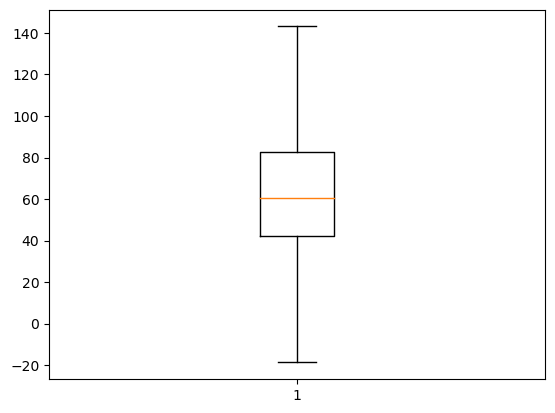

In [ ]:
plt.boxplot(data_cap['Price'],vert=True)

<AxesSubplot:>

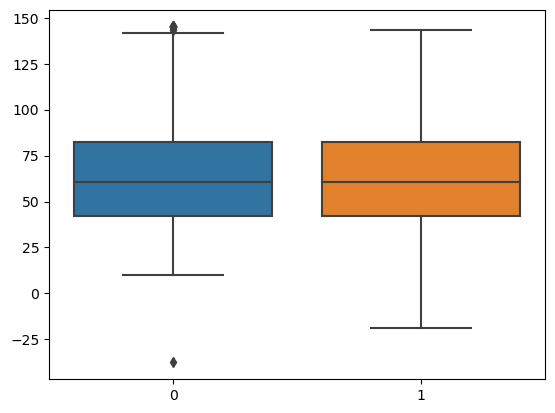

In [ ]:
sns.boxplot(data=[data['Price'], data_cap['Price']])

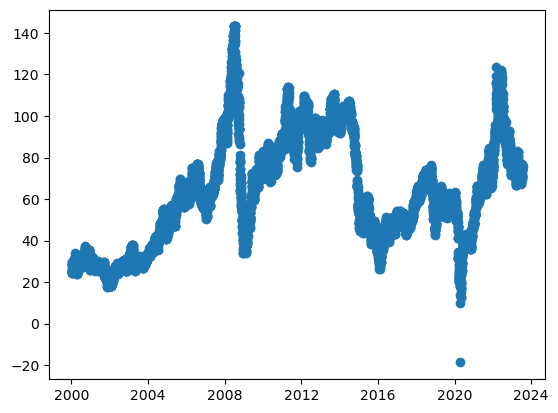

In [ ]:
plt.scatter(data_cap.index, data_cap.Price)

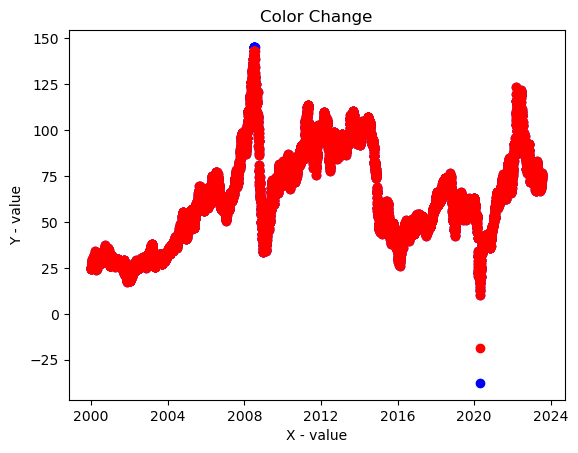

In [ ]:
plt.scatter(data.index, data.Price, color='blue')
plt.scatter(data_cap.index, data_cap.Price, color= 'red')

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Decorate
plt.title('Color Change')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

C:\Users\Rishi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Price'>

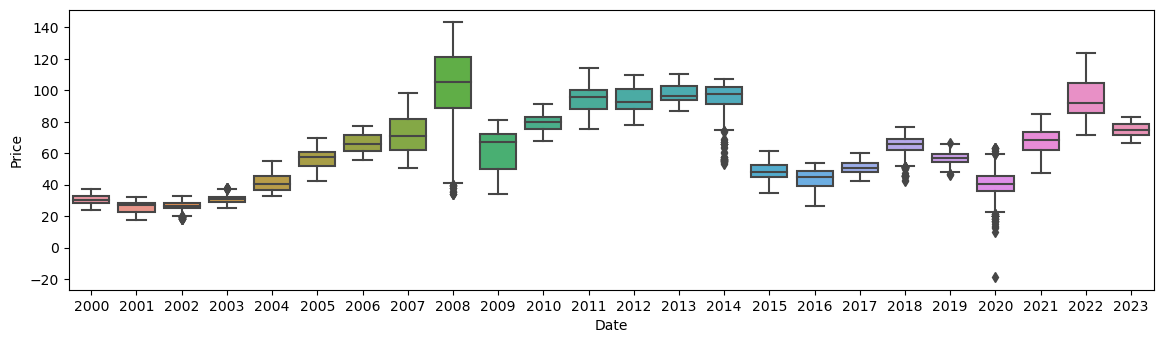

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(data_cap.index.year, y='Price',data=data_cap)

<AxesSubplot:xlabel='Date', ylabel='Price'>

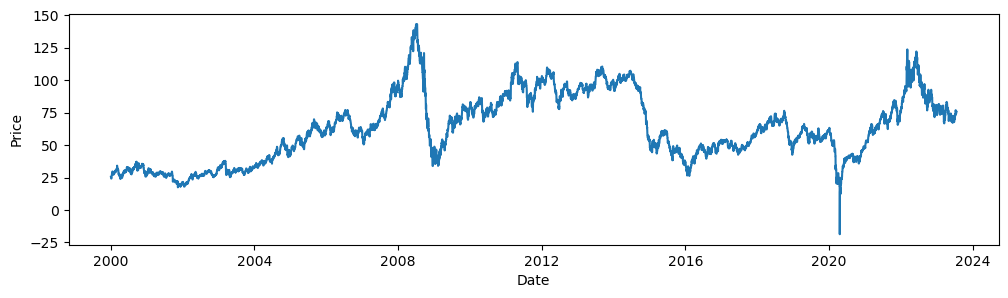

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x='Date', y='Price',data=data_cap)

<AxesSubplot:ylabel='Frequency'>

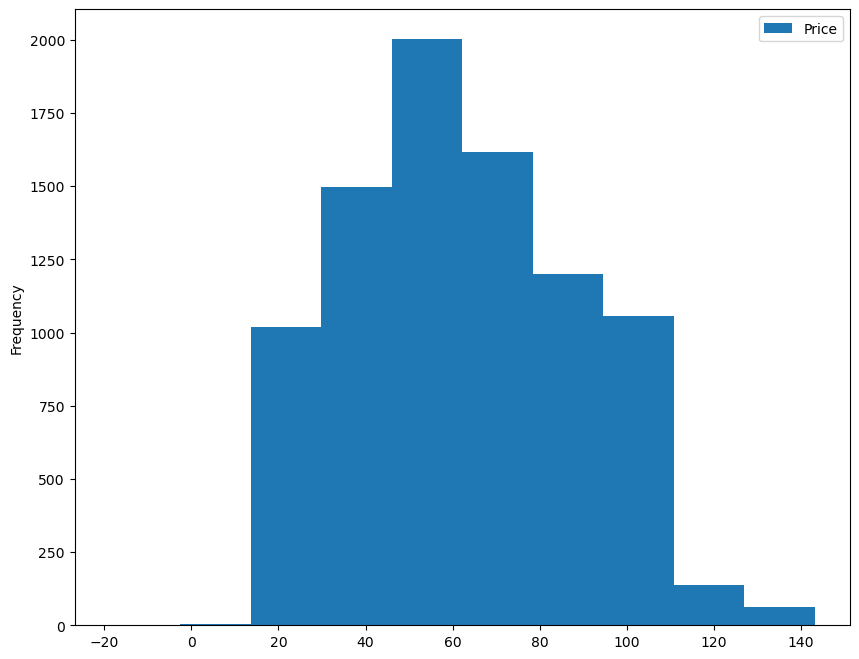

In [ ]:
data_cap.plot.hist()

<AxesSubplot:ylabel='Frequency'>

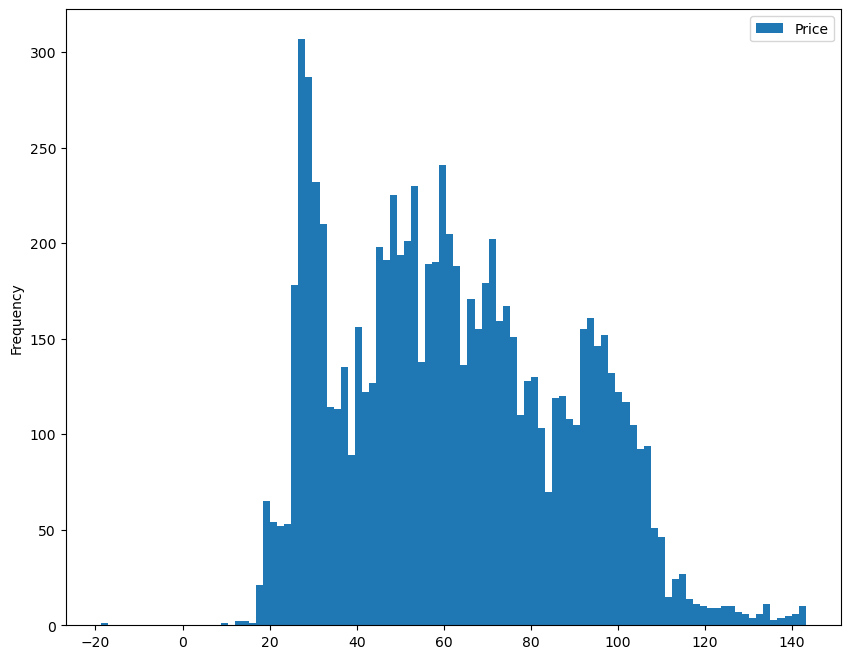

In [ ]:
data_cap.plot(kind="hist",stacked=False,bins=100)

<AxesSubplot:ylabel='Density'>

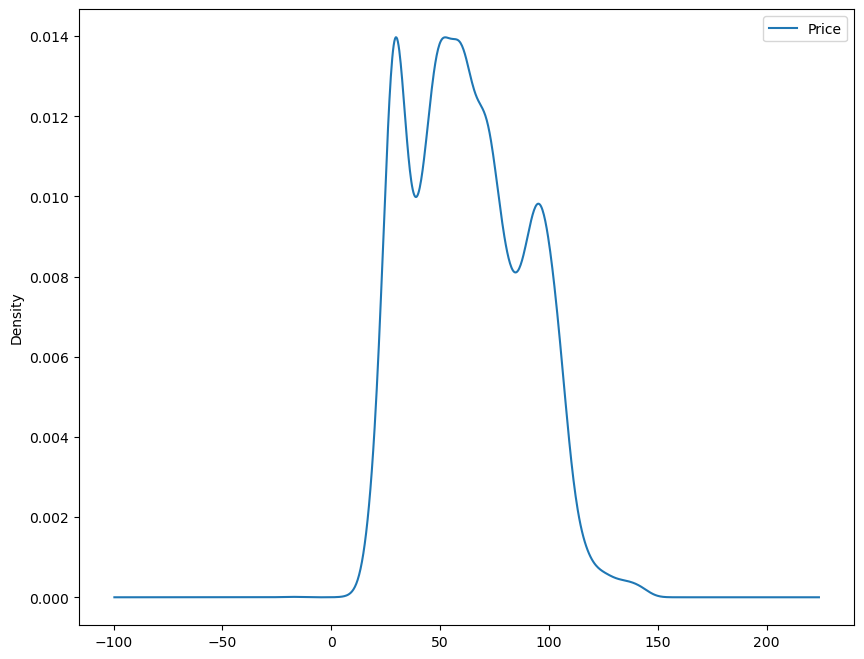

In [ ]:
data_cap.plot(kind="kde")

C:\Users\Rishi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


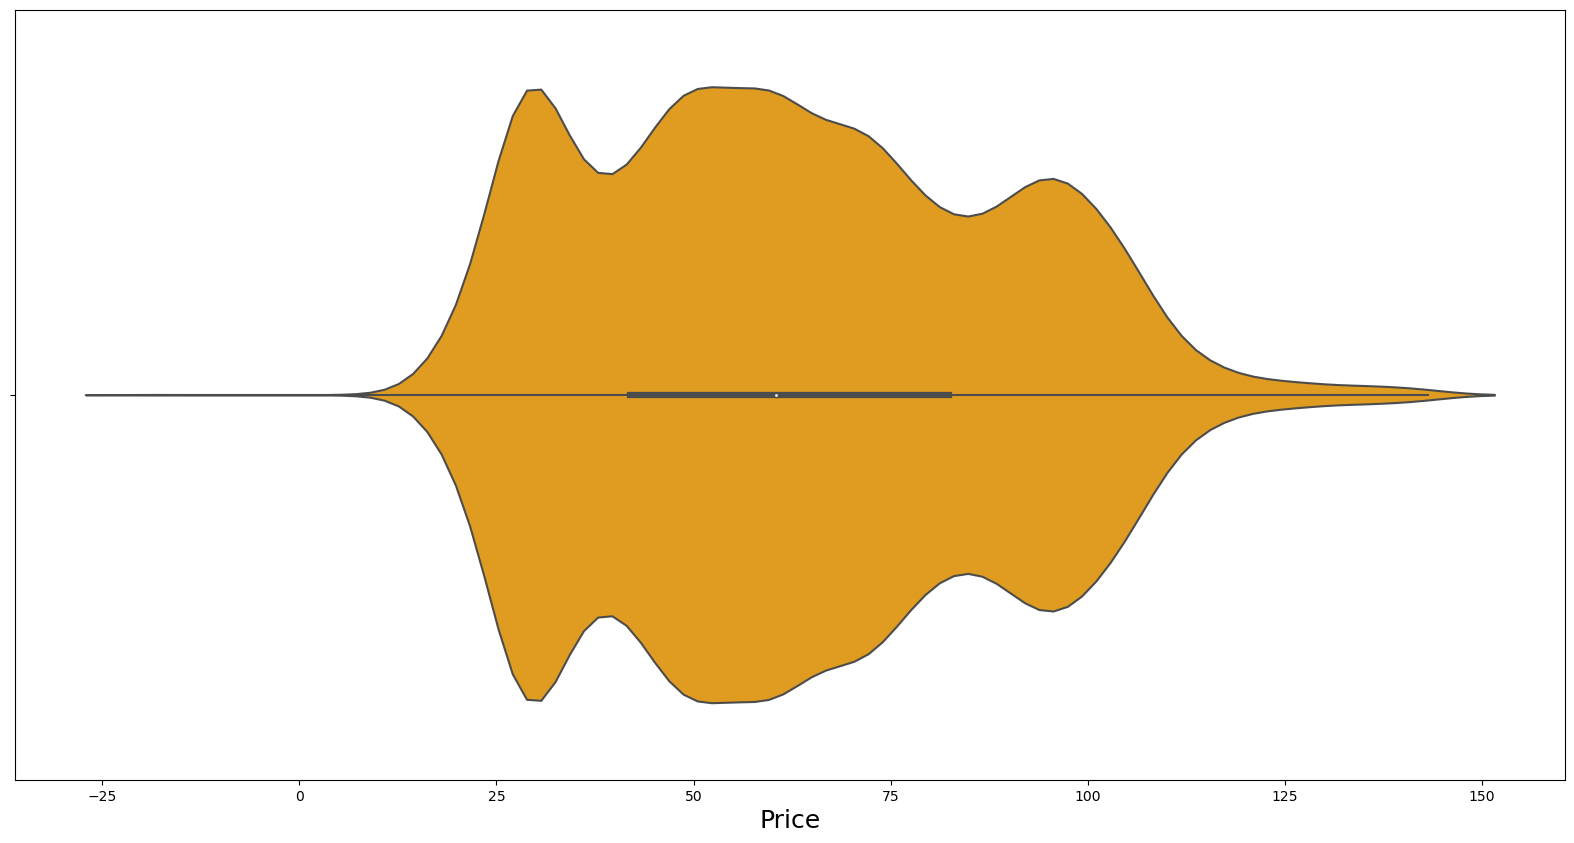

In [ ]:
plt.figure(figsize = (20,10))
sns.violinplot(data_cap['Price'], color = 'Orange');
plt.xlabel('Price',fontsize = 18);

### Autocorrelation Analysis

It is a correlation a variable and its lagged version (one time-step or more)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

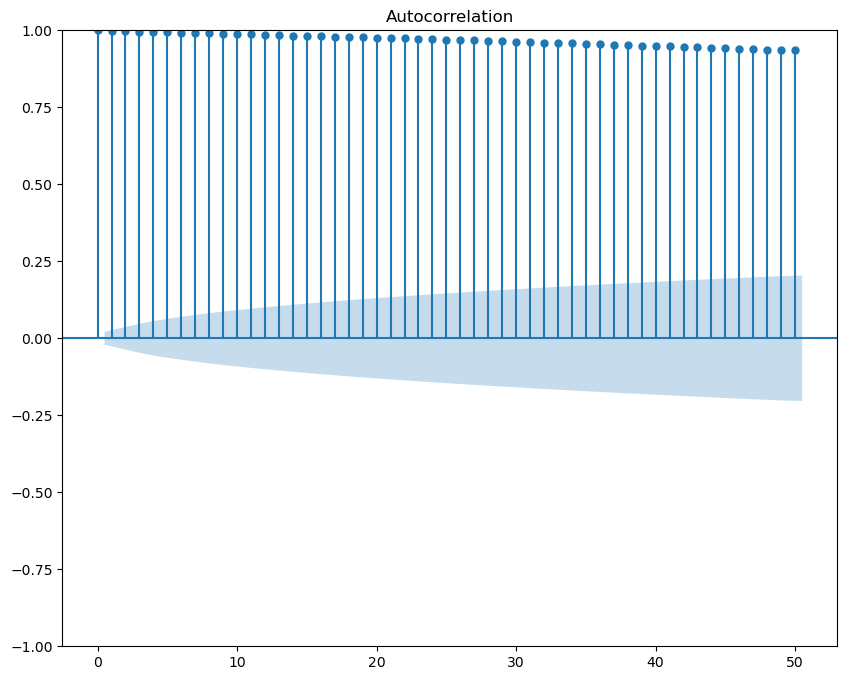

In [ ]:
plot_acf(data_cap.Price,lags=50)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\Rishi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


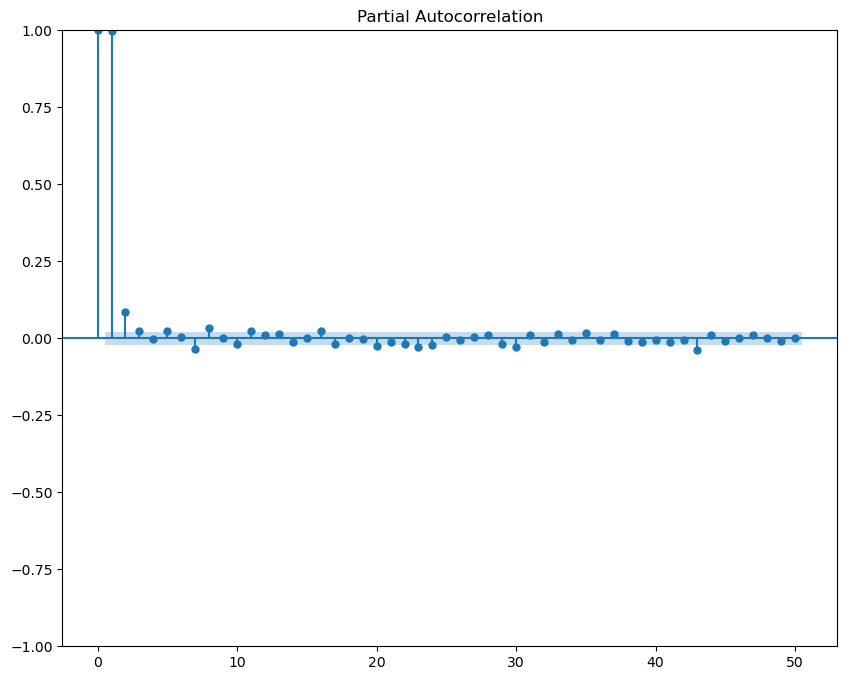

In [ ]:
plot_pacf(data_cap.Price,lags=50)
plt.show()

### Transformation

To remove the noise and improve the signal in time series forcasting.

In [ ]:
data_cap["t"] = np.arange(1,8600)
data_cap["t_squared"] = data_cap["t"]*data_cap["t"]

data_cap["log_price"] = np.log(data_cap["Price"])

data_cap.head()

C:\Users\Rishi\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Price,t,t_squared,log_price
Date,,,,
2000-01-04,25.55,1,1,3.240637
2000-01-05,24.91,2,4,3.215269
2000-01-06,24.78,3,9,3.210037
2000-01-07,24.22,4,16,3.187179
2000-01-08,24.22,5,25,3.187179


1. Square Root Transform

In [ ]:
from pandas import DataFrame
from numpy import sqrt

In [ ]:
dataframe = DataFrame(data_cap.Price.values)
dataframe.columns = ['Price']
dataframe['Price'] = sqrt(dataframe['Price'])

C:\Users\Rishi\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
from matplotlib import pyplot

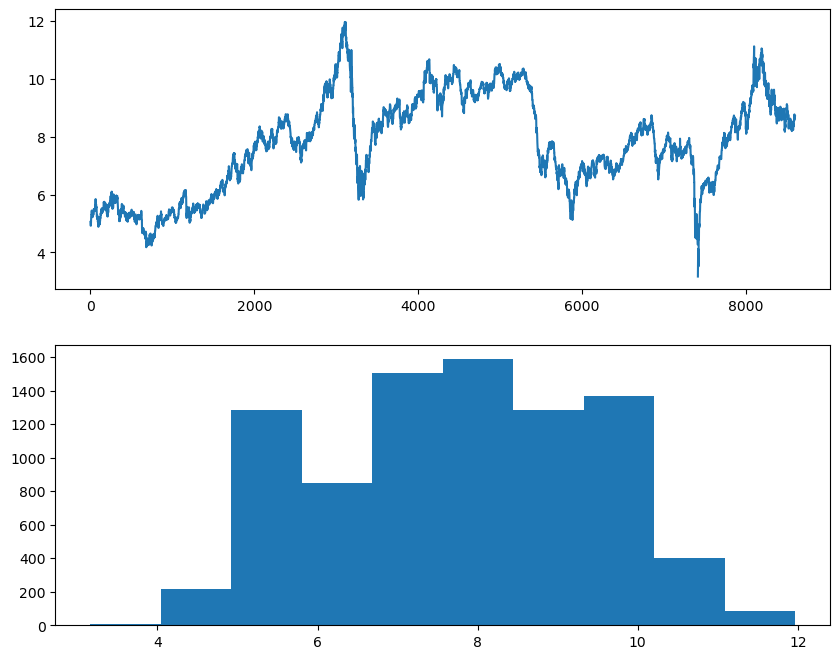

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

C:\Users\Rishi\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


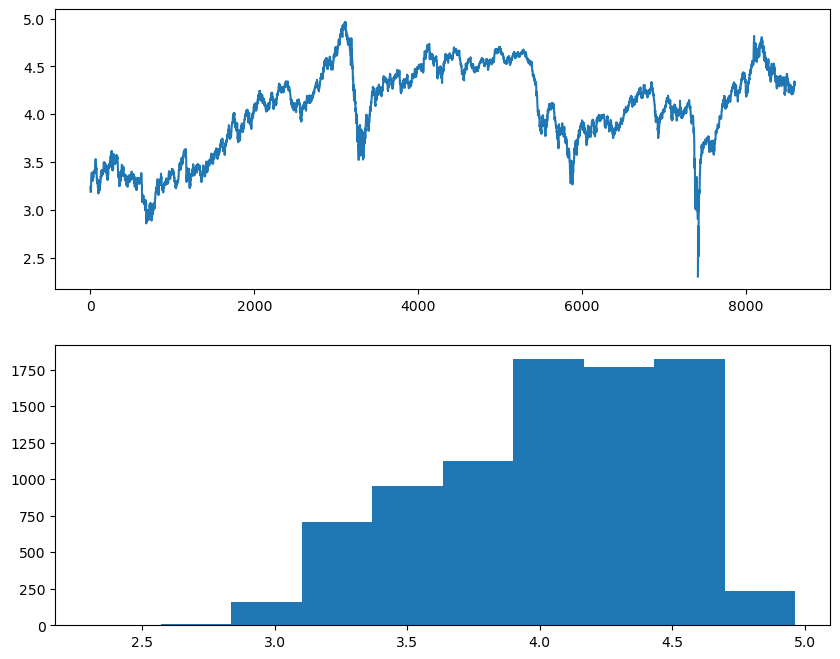

In [ ]:
from numpy import log
dataframe = DataFrame(data_cap.Price.values)
dataframe.columns = ['Price']
dataframe['Price'] = log(dataframe['Price'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['Price'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Price'])
pyplot.show()

### Sequential Split

In [ ]:
Train = data_cap.iloc[:6019]
Test = data_cap.iloc[6019:]
Train

,Price,t,t_squared,log_price
Date,,,,
2000-01-04,25.55,1,1,3.240637
2000-01-05,24.91,2,4,3.215269
2000-01-06,24.78,3,9,3.210037
2000-01-07,24.22,4,16,3.187179
2000-01-08,24.22,5,25,3.187179
...,...,...,...,...
2016-06-22,49.13,6015,36180225,3.894470
2016-06-23,50.11,6016,36192256,3.914221
2016-06-24,47.64,6017,36204289,3.863673


In [ ]:
Test

,Price,t,t_squared,log_price
Date,,,,
2016-06-27,46.33,6020,36240400,3.835790
2016-06-28,47.85,6021,36252441,3.868071
2016-06-29,49.88,6022,36264484,3.909620
2016-06-30,48.33,6023,36276529,3.878052
2016-07-01,48.99,6024,36288576,3.891616
...,...,...,...,...
2023-07-16,75.42,8595,73874025,4.323072
2023-07-17,74.15,8596,73891216,4.306090
2023-07-18,75.75,8597,73908409,4.327438


In [ ]:
Train.shape, Test.shape

((6019, 4), (2580, 4))

# Evaluation Metrics

### Linear Model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
linear_model = smf.ols('Price ~ t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_linear))**2))
rmse_linear

47.79180534155189

### Exponential Model

In [ ]:
Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Price'])-np.array(np.exp(pred_Exp)))**2))
print("Root Mean Square Error : ",rmse_Exp)

Root Mean Square Error :  70.59335547227876


### Quadratic Model

In [ ]:
Quad = smf.ols('Price~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Price'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  49.33196649508669


### Compare the Model

In [ ]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,47.791805
2,rmse_Quad,49.331966
1,rmse_Exp,70.593355


Out of all three, the linear model is best beause it is having the least rmse value, so we will use it for forecasting.

### Predict for new time period

In [ ]:
data = data_cap[['Price', 't']].copy()
train = data[:6019]
test = data[6019:]

model_full = smf.ols('Price ~ t', data=train).fit()

# Assuming 'predict_data' has a column 't' for new data points
pred_new = pd.Series(model_full.predict(test['t']))
pred_new

Date
2016-06-27     94.247946
2016-06-28     94.258303
2016-06-29     94.268660
2016-06-30     94.279016
2016-07-01     94.289373
                 ...    
2023-07-16    120.916458
2023-07-17    120.926814
2023-07-18    120.937171
2023-07-19    120.947528
2023-07-20    120.957885
Length: 2580, dtype: float64

### Moving Average

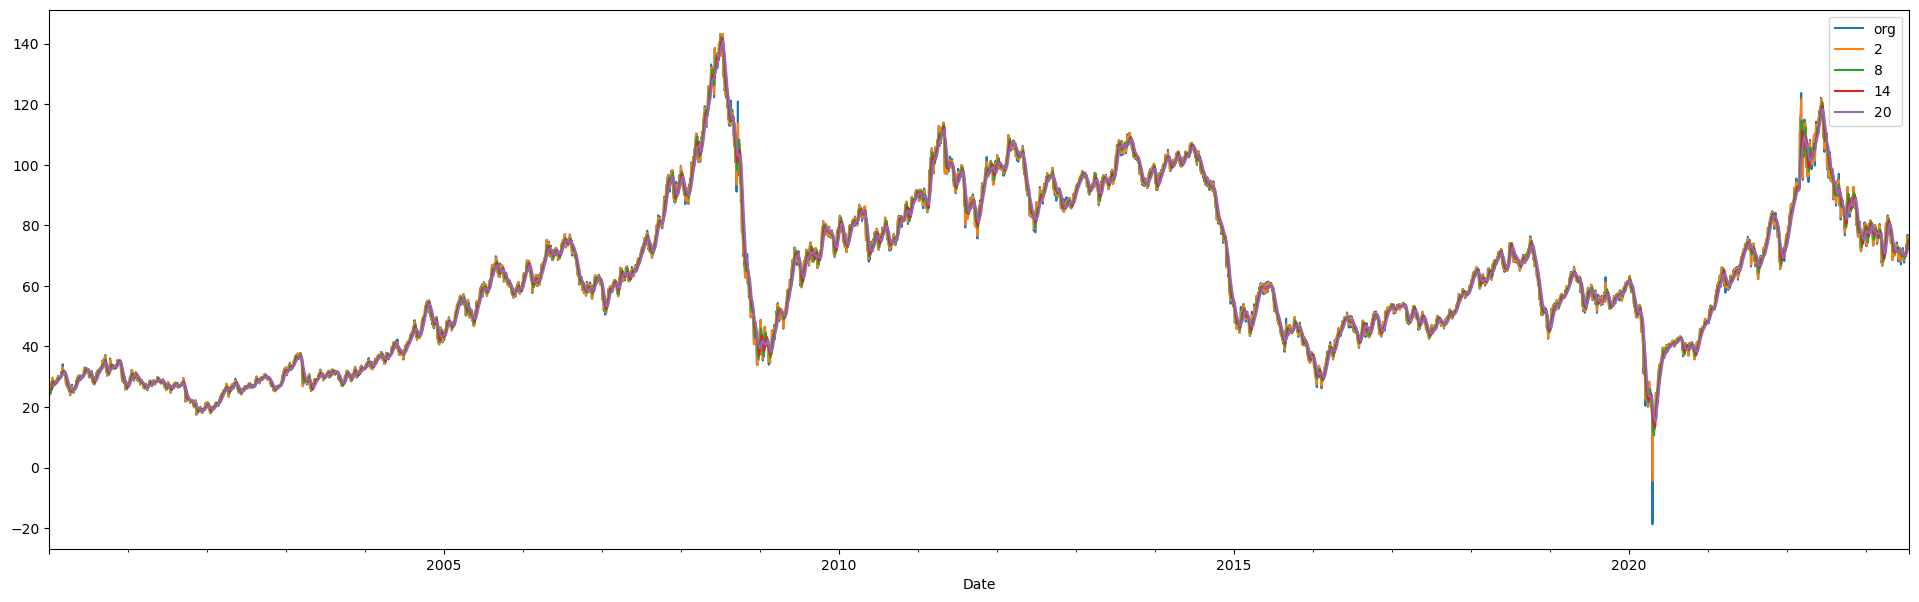

In [ ]:
plt.figure(figsize=(24,7))
data_cap.Price.plot(label="org")
for i in range(2,24,6):
    data_cap["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Time Series Decomposition Plot

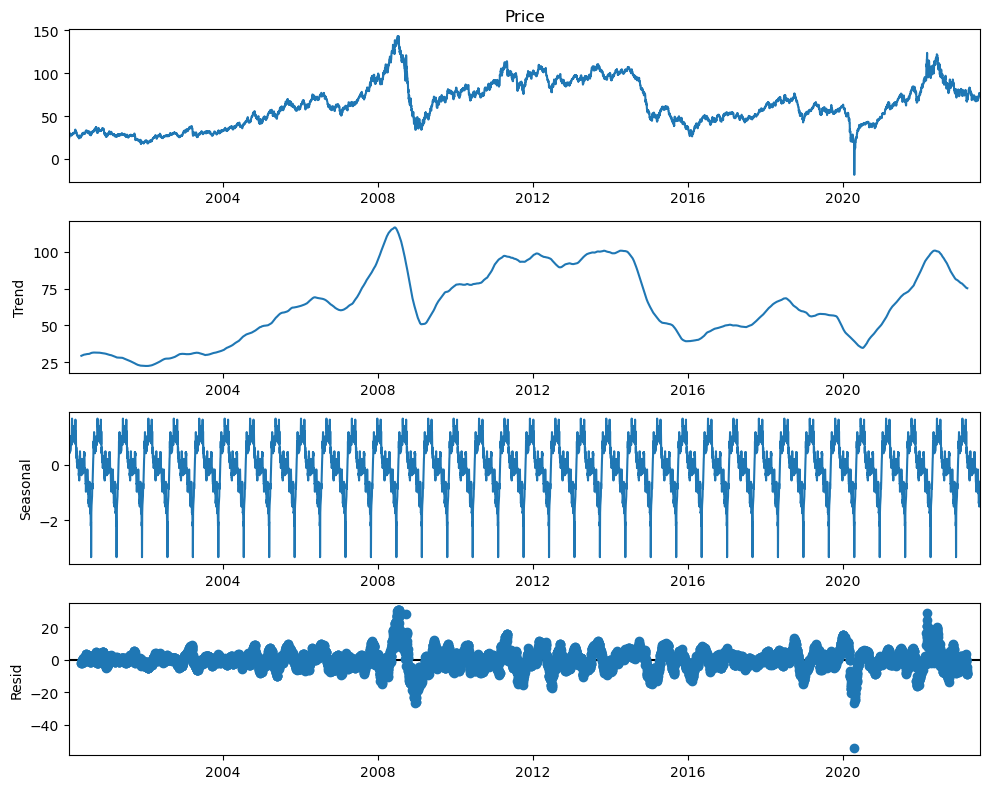

In [ ]:
decompose_ts_add = seasonal_decompose(data_cap.Price, period =240)
decompose_ts_add.plot()
plt.show()

By this decompose method we get to know that both Trend & Sesonality components are present so will go for Holt's Winter's Method

### Evaluation Metric MAPE

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [ ]:
#Fit the Simple Exponential Smoothing model to the training data
ses_model = SimpleExpSmoothing(Train["Price"]).fit(smoothing_level=0.2)

#Make predictions on the test data using the fitted model
pred_ses = ses_model.predict(start=Test.index[0], end=Test.index[-1])

# Calculate MAPE
MAPE(pred_ses,Test.Price)

25.982948173471154

### Holt's Method

In [ ]:
hw_model = Holt(Train["Price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)

pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

MAPE(pred_hw,Test.Price)

C:\Users\Rishi\AppData\Local\Temp\ipykernel_16648\2852540455.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


397.96722984639445

### Holt's Winter's Exponential Smoothing with Additive seasonality & Additive Trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Price"],seasonal="add",trend="add",seasonal_periods=240).fit()

pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

MAPE(pred_hwe_add_add,Test.Price)

C:\Users\Rishi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


45.67143161654713

### Holt's Winter's Exponential Smoothing with Multiplicative seasonality & Additive Trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Price"],seasonal="mul",trend="add",seasonal_periods=240).fit()

pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])

MAPE(pred_hwe_mul_add,Test.Price)

C:\Users\Rishi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


27.129487083952103

In [ ]:
data = {"MODEL":pd.Series(["MAPE(pred_ses,Test.Price)","MAPE(pred_hw,Test.Price)","MAPE(pred_hwe_add_add,Test.Price)","MAPE(pred_hwe_mul_add,Test.Price)"]),"pred_values":pd.Series([MAPE(pred_ses,Test.Price),MAPE(pred_hw,Test.Price),MAPE(pred_hwe_add_add,Test.Price),MAPE(pred_hwe_mul_add,Test.Price)])}

table_pred = pd.DataFrame(data)

table_pred.sort_values(['pred_values'])

,MODEL,pred_values
0,"MAPE(pred_ses,Test.Price)",25.982948
3,"MAPE(pred_hwe_mul_add,Test.Price)",27.129487
2,"MAPE(pred_hwe_add_add,Test.Price)",45.671432
1,"MAPE(pred_hw,Test.Price)",397.967230


Simple Exponential Method is giving the least error so we will make the final model on it.

### Final Model by Combining Train & Test

Now we are fitting the same model with complete dataset

In [ ]:
ses_model = SimpleExpSmoothing(data_cap["Price"]).fit(smoothing_level=0.2)
ses_model.forecast(12)

2023-07-21    75.118801
2023-07-22    75.118801
2023-07-23    75.118801
2023-07-24    75.118801
2023-07-25    75.118801
2023-07-26    75.118801
2023-07-27    75.118801
2023-07-28    75.118801
2023-07-29    75.118801
2023-07-30    75.118801
2023-07-31    75.118801
2023-08-01    75.118801
Freq: D, dtype: float64

### Check for Stationarity

Stationarity means mean and variance should be constant.

ADF Test for checking the same

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_cap['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.512584
p-value: 0.112442


Here p value is greater than alpha which is 0.112442 so we will accept the H0 Hypothesis and by this the data is non-stationery

### Converting Non Stationarity time series to Stationarity

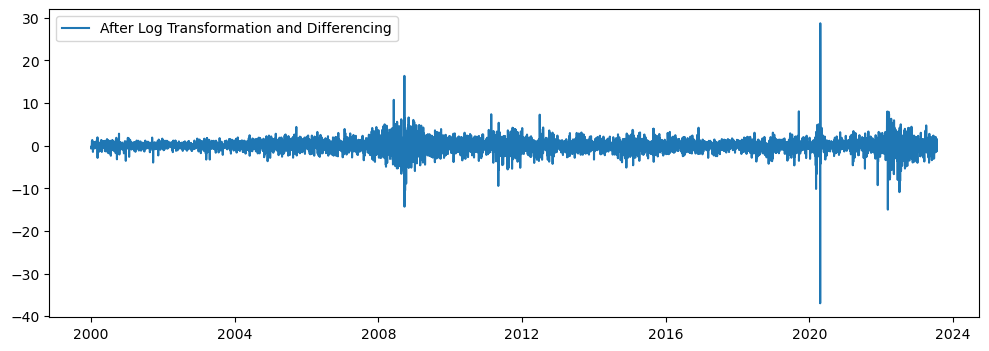

In [ ]:
data = data_cap[['Price']].copy()
data_diff = data - data.shift()
data_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_diff, label='After Log Transformation and Differencing')
plt.legend(loc='best')
plt.show()

Observation : We can see that there is no trend (upward or downward) after differencing on the Log transformation.The mean is zero. Also, the variance is almost constant.

### Series is stationary, so will use this for forecasting

###ACF and PACF plots of Stationary Series

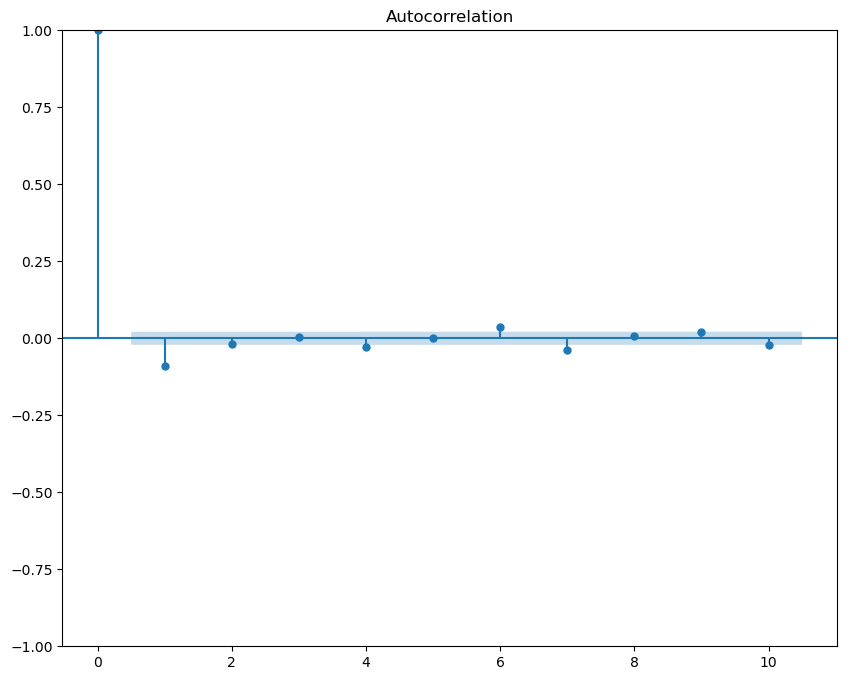

In [ ]:
# Autocorrelation Function (ACF)
plot_acf(data_diff.Price,lags=10)
plt.show()

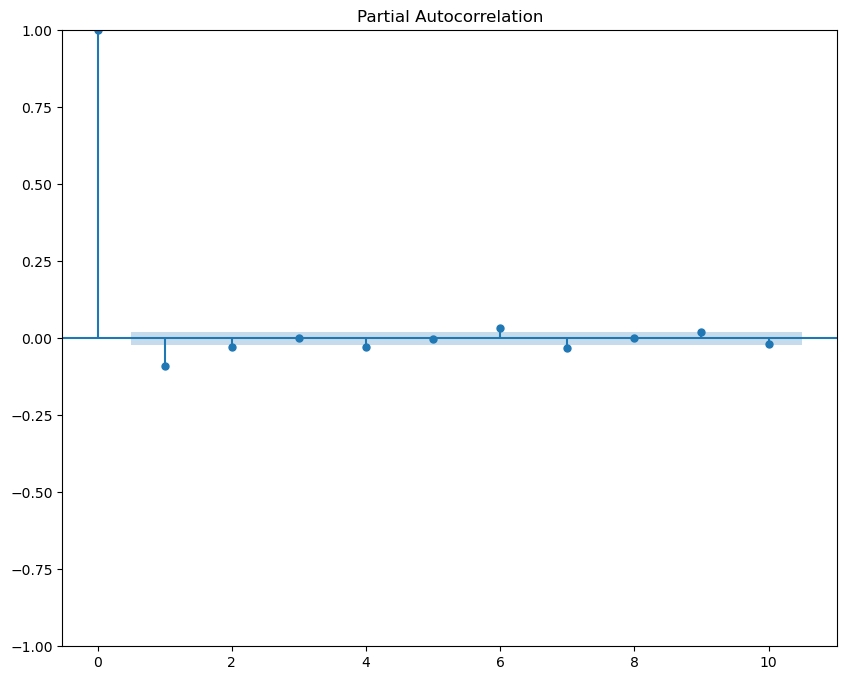

In [ ]:
# Partial Autocorrelation Function (PACF)
plot_pacf(data_diff.Price,lags=10)
plt.show()

### Persistence/Base/ Naive Model

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
data = data_diff.copy()
train = data[:6019]
test = data[6019:]

In [ ]:
def persistence_forecast(history, n_forecast):
    forecast = history[-1]  # Start the forecast with the last value in the history
    forecast_values = [forecast]

    for i in range(n_forecast):
        forecast_values.append(forecast)

    return forecast_values

def calculate_rmse(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    rmse = np.sqrt(mse)
    return rmse

train_data = train['Price'].values
test_data = test['Price'].values

forecast_horizon = len(test_data)
forecast = persistence_forecast(train_data, forecast_horizon)

# Calculate RMSE
rmse = calculate_rmse(forecast[:-1], test_data)

print('RMSE: %.3f' % rmse)

RMSE: 23.486


### ARIMA Model Hyperparameters

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
def evaluate_arima_model(X, arima_order):

    X = X.astype('float32')
    train_size = len(X) - 5  # Using the last 5 data points as the test set
    train, test = X[:train_size], X[train_size:]
    history = [x for x in train]

    # Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Calculate out-of-sample error (RMSE)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

# Set the desired ARIMA order (replace these with your values)
p, d, q = 2, 1, 1

# Evaluate the ARIMA model with the given order
rmse = evaluate_arima_model(data_cap['Price'], (p, d, q))
print('RMSE: %.3f' % rmse)

RMSE: 0.899


### Grid search for p,d,q values

In [ ]:
# Perform grid search for p, d, and q values
def grid_search_arima(X, p_values, d_values, q_values):

    best_rmse, best_order = float('inf'), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(X, order)
                    if rmse < best_rmse:
                        best_rmse, best_order = rmse, order
                except:
                    continue

    return best_rmse, best_order

# Define the ranges of p, d, and q values to try
p_values = range(3)    # Try orders 0, 1, and 2 for p
d_values = range(3)    # Try orders 0, 1, and 2 for d
q_values = range(3)    # Try orders 0, 1, and 2 for q

# Perform grid search
best_rmse, best_order = grid_search_arima(data_cap['Price'], p_values, d_values, q_values)

print("Best RMSE:", best_rmse)
print("Best (p, d, q) order:", best_order)

C:\Users\Rishi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best RMSE: 0.8860451247299703
Best (p, d, q) order: (2, 2, 2)


In [ ]:
import warnings
from itertools import product

In [ ]:
def evaluate_models(data, p_values, d_values, q_values):
    best_rmse = float('inf')
    best_order = None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(data, order=order)
                    model_fit = model.fit()
                    forecast = model_fit.forecast(len(data))
                    rmse = calculate_rmse(forecast, data)
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_order = order
                except:
                    continue

    return best_order, best_rmse

def calculate_rmse(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    rmse = np.sqrt(mse)
    return rmse

# Assuming you have defined 'train' dataframe for the time series

# Define the parameter ranges
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Suppress warnings to avoid clutter in the output
warnings.filterwarnings("ignore")

# Evaluate models with different parameters
best_order, best_rmse = evaluate_models(train['Price'].values, p_values, d_values, q_values)

print(f"Best ARIMA order: {best_order}")
print(f"Best RMSE: {best_rmse:.3f}")

Best ARIMA order: (2, 0, 2)
Best RMSE: 26.143


### Build Model based on the optimized values

In [ ]:
def calculate_rmse(predictions, targets):
    mse = np.mean((predictions - targets) ** 2)
    rmse = np.sqrt(mse)
    return rmse

# Assuming you have defined 'train' and 'test' dataframes for the time series

# Convert 'train' data to float32
X = train['Price'].values
X = X.astype('float32')

# Fit the ARIMA model
model = ARIMA(X, order=(2, 2, 2))
model_fit = model.fit()

# Forecast the next 10 steps
forecast_values = model_fit.forecast(steps=10)[0]

# Get the last 10 elements of the test data for RMSE calculation
test_data = test['Price'].values[-10:]

# Calculate the RMSE for the forecast
rmse = calculate_rmse(forecast_values, test_data)
print(f"RMSE for the forecast: {rmse:.3f}")

RMSE for the forecast: 27.830


### Combine train and test data and build final model

In [ ]:
X = train['Price'].values
X = X.astype('float32')

# Initialize the ARIMA model with the appropriate order (p, d, q).
# The order=(2, 2, 2)  used means: p=2 (AR order), d=2 (degree of differencing), q=2 (MA order).
model = ARIMA(X, order=(2, 2, 2))

# Fit the ARIMA model to the data to estimate the parameters.
model_fit = model.fit()

# Forecast the next 10 steps (periods) using the fitted model.
forecast = model_fit.forecast(steps=10)

# The forecast variable will contain the predicted values for the next 10 steps.
print(forecast)

[47.64854325 47.63721772 47.64575928 47.63503454 47.64296185 47.63283349
 47.6401834  47.63061399 47.63742282 47.62837718]
